Requirements:
- an .h5 file containing the scans
- the scan numbers you're after

In [1]:
import h5py
# from ipywidgets import interact
import xrayutilities_id01_functions as id01
import xrayutilities as xu
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'

SyntaxError: invalid syntax (xrayutilities_id01_functions.py, line 107)

In [2]:
d = './h5_files/'
!ls {d} | grep h5

20161115_E16019.h5
20161115_E16020.h5
20161115_E16088.h5
20161115_E16095.h5
20161117_E16014.h5
20161117_E16018.h5


In [3]:
fname = '20161115_E16019.h5'
f = h5py.File(d+fname)
f.keys()

[u'scan_0003', u'scan_0004']

In [10]:
scan_no = 4
h5file = d + fname
phi = f['scan_0003']['data']['spec_motors'].attrs['phi']
phi = phi+90

nx, ny, nz = 350,350,350

qx, qy, qz, gint, gridder = id01.gridmap(h5file, scan_no, nx, ny, nz, angdelta=[0,phi,0,0])

QX, QY, QZ = np.mgrid[qx.min():qx.max():1j*nx,
                     qy.min():qy.max():1j*ny,
                     qz.min():qz.max():1j*nz]

INT = xu.maplog(gint, 4.5, 0)

['del', 'eta', 'H', 'K', 'L', 'Epoch', 'Seconds', 'bv1', 'opt1', 'opt2', 'bv2', 'att2', 'bv3', 'bv4', 'exp2', 'Srcur', 'roi1', 'roi2', 'roi3', 'roi4', 'roi5', 'mpx4ro1', 'mpx4ro2', 'mpx4inr', 'exp1', 'mpx4int']
None
None
['eta', 'del']


**axis 0 is qyqz, axis 1 is qxqz**

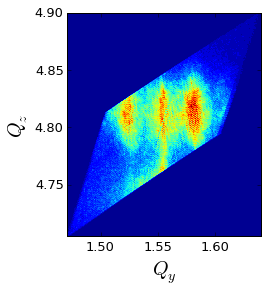

In [11]:
plt.contourf(QY[0,:,:],QZ[0,:,:],INT.sum(axis=0),40)
plt.axis([QY[0,:,:].min(),QY[0,:,:].max(),QZ[0,:,:].min(),QZ[0,:,:].max()])
plt.xlabel(r'$Q_y$',{'fontsize': 20})
plt.ylabel(r'$Q_z$',{'fontsize': 20})
matplotlib.rcParams.update({'font.size': 13})
plt.savefig('img/' + fname[9:15] + '_s' + str(scan_no) +'_yz.png',dpi=300)
plt.axes().set_aspect('equal')

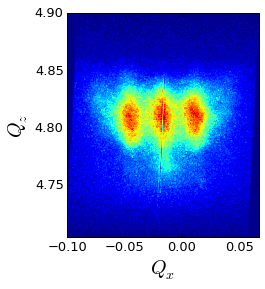

In [12]:
plt.contourf(QX[:,0,:],QZ[:,0,:],INT.sum(axis=1),40)
plt.axis([QX[:,0,:].min(),QX[:,0,:].max(),QZ[0,:,:].min(),QZ[0,:,:].max()])
plt.xlabel(r'$Q_x$',{'fontsize': 20})
plt.ylabel(r'$Q_z$',{'fontsize': 20})
matplotlib.rcParams.update({'font.size': 13})
plt.savefig('img/' + fname[9:15] + '_s' + str(scan_no) +'_xz.png',dpi=300)
plt.axes().set_aspect('equal')

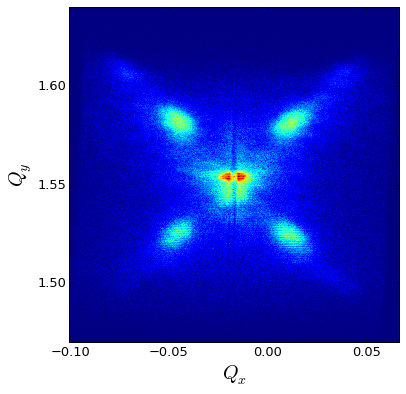

In [13]:
fig = plt.figure(figsize=(7,6))
# plt.contourf(QX[:,:,0],QY[:,:,0],INT.sum(axis=2),60)
plt.pcolormesh(QX[:,:,0],QY[:,:,0],INT.sum(axis=2))
plt.axis([QX[:,0,:].min(),QX[:,0,:].max(),QY[:,:,0].min(),QY[:,:,0].max()]);
plt.xlabel(r'$Q_x$',{'fontsize': 20})
plt.ylabel(r'$Q_y$',{'fontsize': 20})
matplotlib.rcParams.update({'font.size': 13})
plt.locator_params(axis='x',nbins=6)
plt.axes().set_aspect('equal')
plt.savefig('img/' + fname[9:15] + '_s' + str(scan_no) +'_xy.png',dpi=300)

In [47]:
# mlab.figure()
# mlab.contour3d(QX, QY, QZ, INT, contours=10, opacity=.2)
# # mlab.colorbar() makes it crash!
# mlab.axes(nb_labels=5, xlabel='Qx', ylabel='Qy', zlabel='Qz')
# mlab.title('SCAN:%i'%scan_no, size=0.5, height=0.9)
# mlab.show()

In [66]:
phi =X f['scan_0004']['data']['spec_motors'].attrs['phi']

KeyError: "Unable to open object (Object 'scan_0004' doesn't exist)"

In [66]:
phi = f['scan_0004']['data']['spec_motors'].attrs['phi']

KeyError: "Unable to open object (Object 'scan_0004' doesn't exist)"